In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

# LVQ

Tugas Praktikan adalah melakukan modifikasi kode untuk algoritma lain dari LVQ yaitu LVQ2 dan LVQ2.1.




## Kode

LVQ

In [24]:
#Tidak perlu diubah
def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    mask = np.ones(len(train), dtype=bool)
    mask[train_idx] = False
    train = train[mask]
    target = target[mask]

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [np.sum((w - x) ** 2) for w in weight]
            min_index = np.argmin(distance)
            sign = 1 if target[i] == label[min_index] else -1
            weight[min_index] += sign * lrate * (x - weight[min_index])
        lrate *= b
        epoch += 1

    return weight, label


LVQ2

In [25]:
def lvq2_fit(train, target, lrate, b, max_epoch, epsilon):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    mask = np.ones(len(train), dtype=bool)
    mask[train_idx] = False
    train = train[mask]
    target = target[mask]

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [np.sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)
            min_indices = np.argsort(distance)[:2]
            c1, c2 = min_indices[0], min_indices[1]

            if distance[c1] / distance[c2] < (1 - epsilon) / (1 + epsilon):

                if label[c1] == target[i] and label[c2] != target[i]:
                    weight[c1] += lrate * (x - weight[c1])
                    weight[c2] -= lrate * (x - weight[c2])

        lrate *= b
        epoch += 1

    return weight, label


LVQ2.1

In [26]:
import numpy as np

def lvq21_fit(train, target, lrate, b, max_epoch, epsilon):
    # Inisialisasi bobot awal berdasarkan data unik di target
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Hapus data yang digunakan untuk inisialisasi bobot
    mask = np.ones(len(train), dtype=bool)
    mask[train_idx] = False
    train = train[mask]
    target = target[mask]

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            # Hitung jarak dari data ke setiap bobot
            distance = [np.sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)
            min_indices = np.argsort(distance)[:2]  # Ambil dua indeks jarak terkecil
            c1, c2 = min_indices[0], min_indices[1]

            # Periksa kondisi epsilon untuk pembaruan
            if distance[c1] / distance[c2] < (1 - epsilon) / (1 + epsilon):
                if label[c1] == target[i] and label[c2] != target[i]:
                    weight[c1] += lrate * (x - weight[c1])
                    weight[c2] -= lrate * (x - weight[c2])

        # Kurangi learning rate dengan faktor b
        lrate *= b
        epoch += 1

    return weight, label


Fungsi Testing dan Hitung Akurasi


In [27]:
#Tidak perlu diubah
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

## Percobaan

Lakukan training LVQ dengan
- learning rate 0.5
- perubahan learning rate 0.8
- epoch maksimum 100
- epsilon 0.3

Accuracy: 0.5


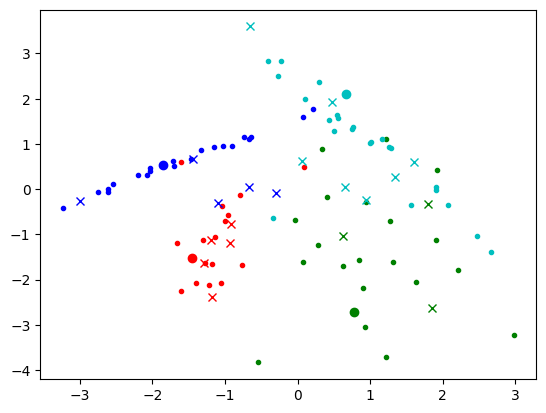

In [28]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_classes=4, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

Accuracy: 0.45


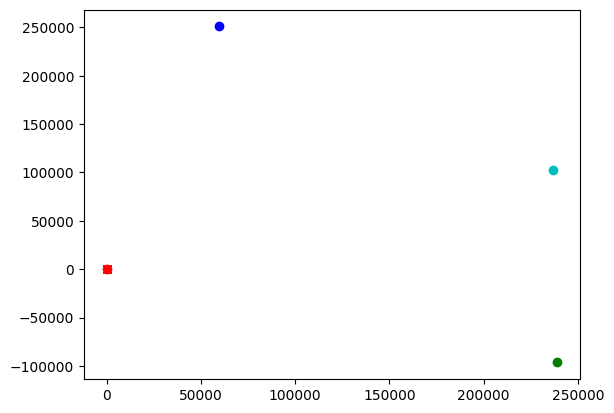

In [29]:
model = lvq2_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100, epsilon=0.3)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

Accuracy: 0.45


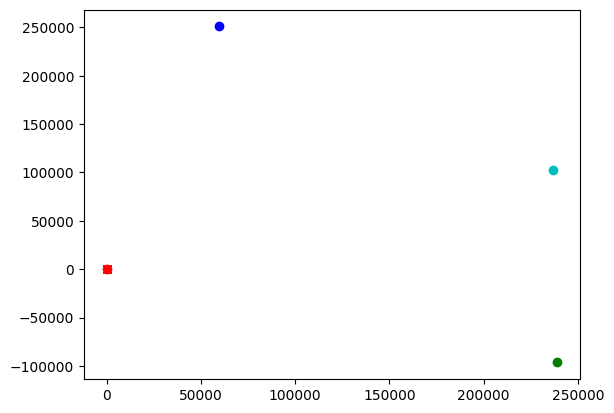

In [30]:
model = lvq21_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100, epsilon=0.3)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

# Analisis

Jelaskan hasil yang anda dapatkan!

Berdasarkan percobaan diatas ketiga fungsi lvq_fit() berbeda berdasarkan 2 hal: jumlah neuron, kondisi pembaruan:
1. jumlah neuron yang diperbarui
lvq_fit memperbaiki satu neuron terdekat sedangkan lvq2 dan lvq21 memperbarui dua neuron terdekat

2. kondisi pembaruan
lvq_fit mempertimbangkan kesamaan label antara neuron terdekat dan target sedangkat lvq2_fit dan lvq21_fit mempertimbangkan rasio jarak antara dua neuron terdekat dan suatu epsilon

nilai akurasi yang berbeda mungkin dikarenakan parameter yang tidak optimal ataupun terdapat overfitting/underfitting pada lvq2 dan lvq21